In [185]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Load the data

In [186]:
import datetime
from helpers import *

height, weight, gender = load_data(sub_sample=False, add_outlier=False)
x, mean_x, std_x = standardize(height)
y, tx = build_model_data(x, weight)

In [187]:
y.shape, tx.shape

((10000,), (10000, 2))

# 1 Computing the Cost Function

Fill in the `compute_loss` function below:
<a id='compute_loss'></a>


In [188]:
def compute_loss(y, tx, w):
    """Calculate the loss.

    You can calculate the loss using mse or mae.
    """
    n = len(y)
    e = y - np.dot(tx,w)
    #return np.dot(np.transpose(e),e)/(2*n)
    return sum(e)/n
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss by MSE
    # ***************************************************
    raise NotImplementedError

In [189]:
compute_loss(y,tx,np.transpose([2,10]))

71.29392200210529

# 2 Grid Search

Fill in the function `grid_search()` below:

In [190]:
def grid_search(y, tx, w0, w1):
    """Algorithm for grid search."""
    losses = np.zeros((len(w0), len(w1)))
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute loss for each combination of w0 and w1.
    # ***************************************************
    for tmp1 in range(0,len(w0)):
        for tmp2 in range(0,len(w1)):
            losses[tmp1,tmp2]=compute_loss(y,tx,np.transpose([w0[tmp1],w1[tmp2]]))
    return losses

In [191]:
grid_search(y,tx,np.zeros(2),np.zeros(2))

array([[ 73.293922,  73.293922],
       [ 73.293922,  73.293922]])

Let us play with the grid search demo now!

In [ ]:
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y, tx, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
print("la")
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

# 3 Gradient Descent

Again, please fill in the functions `compute_gradient` below:

In [ ]:
def compute_gradient(y, tx, w):
    """Compute the gradient."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: compute gradient and loss
    # ***************************************************
    e = y - np.dot(tx,w)
    N = len(y)
    #print(tx)
    #print(e)
    #return np.dot(np.transpose(tx),e)/(-N)
    e[e < 0] = -1
    e[e > 0] = 1
    e[(e <= 0) & (e >= 1)] = 0 
    return np.dot(np.transpose(tx),e)/(-N)

In [ ]:
compute_gradient(y, tx, np.transpose([75,15]))

Please fill in the functions `gradient_descent` below:

In [152]:
def gradient_descent(y, tx, initial_w, max_iters, gamma):
    """Gradient descent algorithm."""
    # Define parameters to store w and loss
    ws = [initial_w]
    losses = []
    w = initial_w
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        gradient = compute_gradient(y, tx, w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))

    return losses, ws

Test your gradient descent function through gradient descent demo shown below:

In [153]:
# from gradient_descent import *
from plots import gradient_descent_visualization

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7

# Initialization
w_initial = np.transpose(np.array([0, 0]))

# Start gradient descent.
start_time = datetime.datetime.now()
gradient_losses, gradient_ws = gradient_descent(y, tx, w_initial, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("Gradient Descent: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=73.29392200210475, w0=0.7, w1=-1.846274244599044e-15
Gradient Descent(1/49): loss=72.59392200210564, w0=1.4, w1=-3.692548489198088e-15
Gradient Descent(2/49): loss=71.89392200210507, w0=2.0999999999999996, w1=-5.538822733797132e-15
Gradient Descent(3/49): loss=71.19392200210521, w0=2.8, w1=-7.385096978396176e-15
Gradient Descent(4/49): loss=70.49392200210522, w0=3.5, w1=-9.231371222995221e-15
Gradient Descent(5/49): loss=69.79392200210475, w0=4.2, w1=-1.1077645467594266e-14
Gradient Descent(6/49): loss=69.0939220021055, w0=4.9, w1=-1.292391971219331e-14
Gradient Descent(7/49): loss=68.39392200210523, w0=5.6000000000000005, w1=-1.4770193956792355e-14
Gradient Descent(8/49): loss=67.69392200210547, w0=6.300000000000001, w1=-1.66164682013914e-14
Gradient Descent(9/49): loss=66.99392200210531, w0=7.000000000000001, w1=-1.8462742445990445e-14
Gradient Descent(10/49): loss=66.29392200210484, w0=7.700000000000001, w1=-2.030901669058949e-14
Gradient Descent(11/49):

<function __main__.plot_figure>

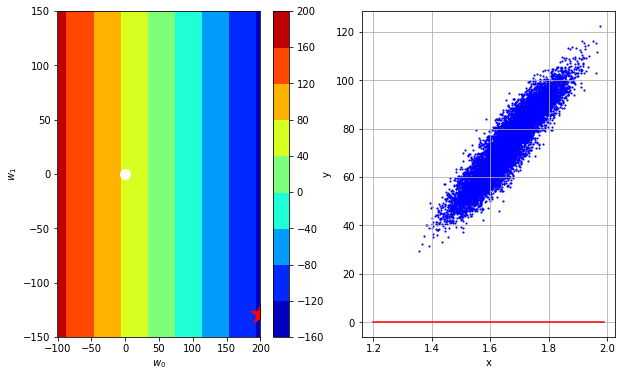

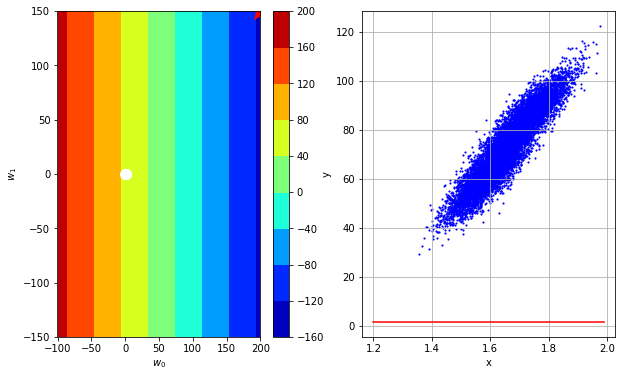

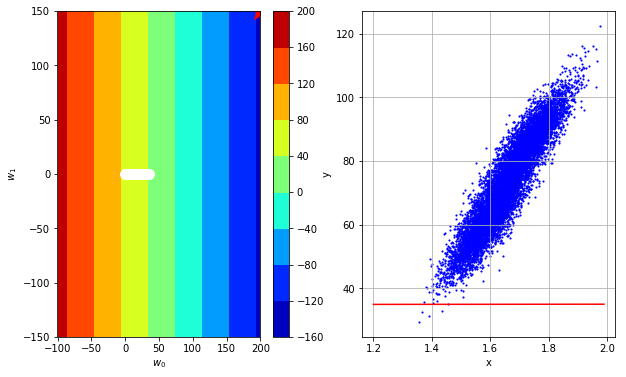

In [154]:
# Time Visualization
from ipywidgets import IntSlider, interact

def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        gradient_losses, gradient_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 4 Stochastic gradient descent

In [155]:
def compute_stoch_gradient(y, tx, w):
    """Compute a stochastic gradient from just few examples n and their corresponding y_n labels."""
    # ***************************************************
    # INSERT YOUR CODE HERE
    # TODO: implement stochastic gradient computation.It's same as the gradient descent.
    # ***************************************************
    return compute_gradient(y, tx, w)

def stochastic_gradient_descent(
        y, tx, initial_w, batch_size, max_iters, gamma):
    """Stochastic gradient descent algorithm."""
    losses = []
    w = initial_w
    ws = [initial_w]
    for n_iter in range(max_iters):
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: compute gradient and loss
        # ***************************************************
        loss = compute_loss(y, tx, w)
        tmp1,tmp2 = batch_iter(y, tx, 1, num_batches=1, shuffle=True).__next__()
        gradient = compute_stoch_gradient(tmp1,tmp2,w)
        # ***************************************************
        # INSERT YOUR CODE HERE
        # TODO: update w by gradient
        # ***************************************************
        w = w - gamma * gradient
        # store w and loss
        ws.append(w)
        losses.append(loss)
        print("Gradient Descent({bi}/{ti}): loss={l}, w0={w0}, w1={w1}".format(
              bi=n_iter, ti=max_iters - 1, l=loss, w0=w[0], w1=w[1]))
        
    return losses, ws

In [156]:
# from stochastic_gradient_descent import *

# Define the parameters of the algorithm.
max_iters = 50
gamma = 0.7
batch_size = 1

# Initialization
w_initial = np.array([0, 0])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(
    y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

Gradient Descent(0/49): loss=73.29392200210475, w0=0.7, w1=0.5336366815448371
Gradient Descent(1/49): loss=72.59392200210489, w0=1.4, w1=-0.06662259820441463
Gradient Descent(2/49): loss=71.89392200210521, w0=2.0999999999999996, w1=0.17986808080599362
Gradient Descent(3/49): loss=71.19392200210481, w0=2.8, w1=1.1508414311485913
Gradient Descent(4/49): loss=70.49392200210546, w0=3.5, w1=2.275491019241108
Gradient Descent(5/49): loss=69.79392200210552, w0=4.2, w1=3.4323364486831656
Gradient Descent(6/49): loss=69.09392200210507, w0=4.9, w1=3.9979260996599613
Gradient Descent(7/49): loss=68.39392200210531, w0=5.6000000000000005, w1=3.4711714739276465
Gradient Descent(8/49): loss=67.69392200210505, w0=6.300000000000001, w1=4.355905306933851
Gradient Descent(9/49): loss=66.99392200210512, w0=7.000000000000001, w1=5.338039403623701
Gradient Descent(10/49): loss=66.29392200210515, w0=7.700000000000001, w1=4.735518425639473
Gradient Descent(11/49): loss=65.59392200210532, w0=8.4, w1=3.78497548

<function __main__.plot_figure>

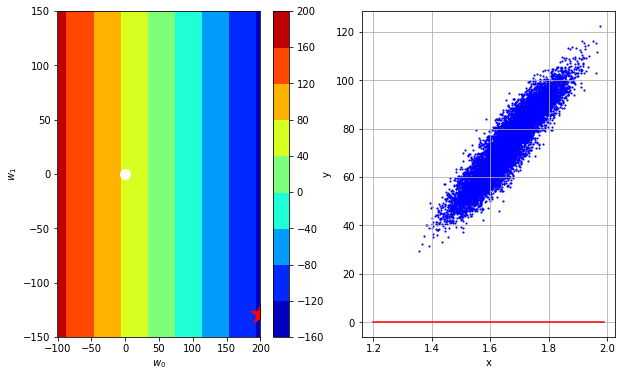

In [157]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x, std_x, height, weight, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

# 5 Effect of Outliers and MAE Cost Function, and Subgradient Descent

### Exercise 5

Load and plot data containing outliers

Grid Search: loss*=-126.3677275402693, w0*=200.0, w1*=150.0, execution time=0.740 seconds


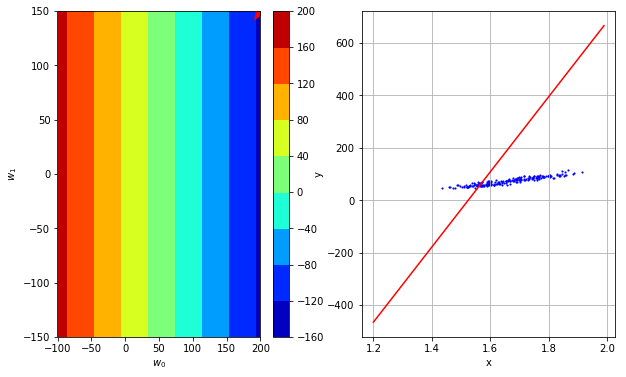

In [158]:
height_new, weight_new, gender_new = load_data(sub_sample=True, add_outlier=False)
from grid_search import generate_w, get_best_parameters
from plots import grid_visualization

#loading the datas:
x_new, mean_x_new, std_x_new = standardize(height_new)
y_new, tx_new = build_model_data(x_new, weight_new)
# Generate the grid of parameters to be swept
grid_w0, grid_w1 = generate_w(num_intervals=100)

# Start the grid search
start_time = datetime.datetime.now()
grid_losses = grid_search(y_new, tx_new, grid_w0, grid_w1)

# Select the best combinaison
loss_star, w0_star, w1_star = get_best_parameters(grid_w0, grid_w1, grid_losses)
end_time = datetime.datetime.now()
execution_time = (end_time - start_time).total_seconds()

# Print the results
print("Grid Search: loss*={l}, w0*={w0}, w1*={w1}, execution time={t:.3f} seconds".format(
      l=loss_star, w0=w0_star, w1=w1_star, t=execution_time))

# Plot the results
fig = grid_visualization(grid_losses, grid_w0, grid_w1, mean_x_new, std_x_new, height_new, weight_new)
fig.set_size_inches(10.0,6.0)
fig.savefig("grid_plot")  # Optional saving

<function __main__.plot_figure>

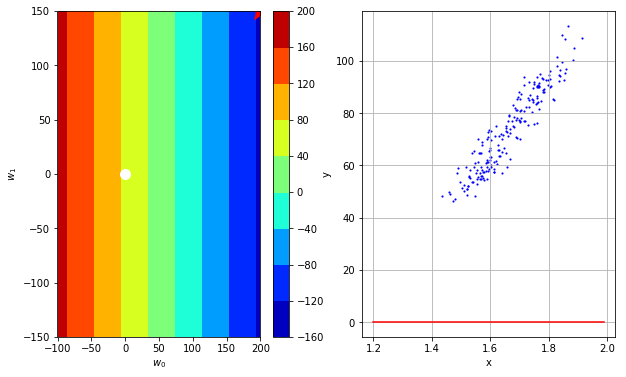

In [159]:
# Time Visualization
from ipywidgets import IntSlider, interact
def plot_figure(n_iter):
    fig = gradient_descent_visualization(
        sgd_losses, sgd_ws, grid_losses, grid_w0, grid_w1, mean_x_new, std_x_new, height_new, weight_new, n_iter)
    fig.set_size_inches(10.0, 6.0)

interact(plot_figure, n_iter=IntSlider(min=1, max=len(gradient_ws)))

### Exercise 6

Modify the function `compute_loss(y, tx, w)` for the Mean Absolute Error cost function [here](#compute_loss)